In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
data = pd.read_csv("C:\\Users\\lopez\\OneDrive\\Documentos\\BD\\articulos_ml.csv")

In [40]:
display(data.head())

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [41]:
data = data.dropna()

In [42]:
data_numeric = data.select_dtypes(include=["int64", "float64"])

In [43]:
print("\nColumnas numéricas utilizadas:")
print(data_numeric.columns)


Columnas numéricas utilizadas:
Index(['Word count', '# of Links', '# of comments', '# Images video',
       'Elapsed days', '# Shares'],
      dtype='object')


In [44]:
y = data_numeric["Elapsed days"]
X = data_numeric.drop("Elapsed days", axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_pred = modelo.predict(X_test_scaled)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados del modelo:")
print("MSE:", mse)
print("R²:", r2)


Resultados del modelo:
MSE: 6331.421938499485
R²: 0.20532480271684872


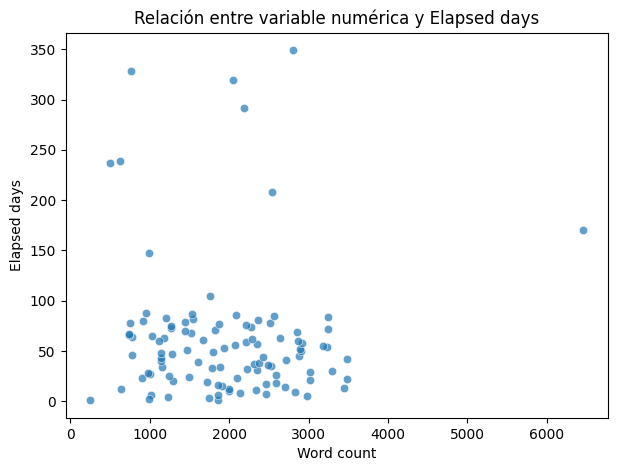

In [50]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=data_numeric,
    x=data_numeric.columns[0],
    y="Elapsed days",
    alpha=0.7
)
plt.title("Relación entre variable numérica y Elapsed days")
plt.xlabel(data_numeric.columns[0])
plt.ylabel("Elapsed days")
plt.show()

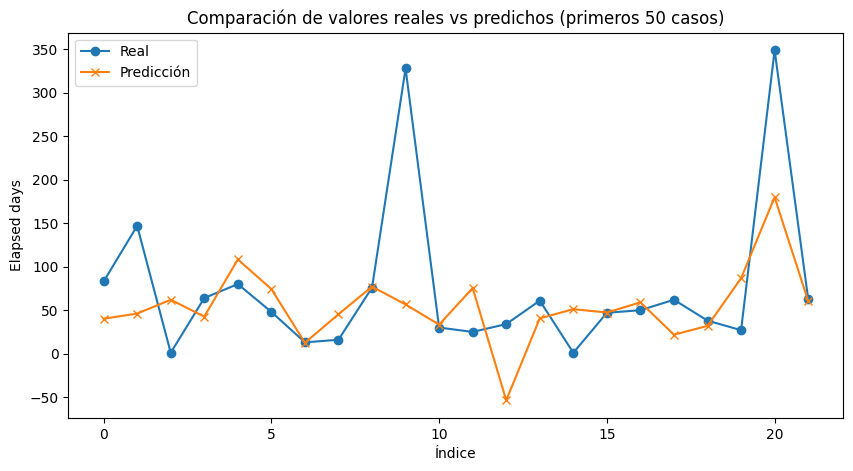

In [51]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Real", marker='o')
plt.plot(y_pred[:50], label="Predicción", marker='x')
plt.title("Comparación de valores reales vs predichos (primeros 50 casos)")
plt.xlabel("Índice")
plt.ylabel("Elapsed days")
plt.legend()
plt.show()